In [10]:
import random
import matplotlib.pyplot as plt
import numpy as np

from classifier import classifier
from sklearn.datasets import make_classification
%matplotlib inline

In [38]:
class Perceptron(classifier):
    """ Constructor for perceptron class
    :param learning_rate: The learning rate used for SGD
    :param epochs: Number of epochs to run
    :param activation: Activation function to be used
                    relu: Use ReLU
                    sigmoid: Use sigmoid
    :param threshold: Threshold used for step function
    """
    def __init__(self, learning_rate=0.001, epochs=1000, activation="sigmoid", threshold=0.5):
        super().__init__()
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.threshold = threshold

        if activation == "relu":
            self.activation = self.relu
        elif activation == "leaky_relu":
            self.activation = self.leaky_relu
        elif activation == "sigmoid":
            self.activation = self.sigmoid
        else:
            self.activation = self.step
        
    """ Fits the data using SGD 
    :param X: Input dataset
    :param Y: Input labels
    """
    
    def fit(self, X, Y):
        super().fit(X, Y)

        self.weights = np.zeros(X.shape[1])
        self.bias = 1
        for i in range(self.epochs):
            if (i % (self.epochs // 5) == 0):
                print("Epoch: %d, weights: %s, bias: %s" % (i, self.weights, self.bias))
            for j in range(X.shape[0]):
                self.sgd(X[j], Y[j])

    """Makes a prediction on a single data point
    :param x: Single data point to make prediction on
    :return: prediction
    """
    
    def _predict(self, x):
        y = np.sum(self.weights * x + self.bias)
        return self.activation(y)

    """ Make prediction over whole data
    :param X: Dataset
    """
    def predict(self, X):
        super().predict(X)
        predictions = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            predictions[i] = self._predict(X[i])
        return predictions

    """Stochastic gradeient descent with batch size 1
    :param x: single row input
    :param y: Label, truth value
    """
    def sgd(self, x, y):
        prediction = self._predict(x)
        self.bias = self.bias + self.learning_rate * (y - prediction) * self.bias
        self.weights = self.weights + self.learning_rate * (y - prediction) * x

    """ReLU
    :param x: input value
    :return: Value after applying ReLU
    """
    def relu(self, x):
        if x < 0:
            return 0
        return x
    """Leaky ReLU
    :param x: input value
    :return: Value after applying leaky relu
    """
    def leaky_relu(self, x):
        if x < 0:
            return x * 0.01
        else:
            return x

    """Sigmoid
    :param x: input value
    :return: Value after applying sigmoid
    """
    def sigmoid(self, x):
        try:
            y = np.exp(x) / (np.exp(x) + 1)
        except Exception:
            print("Problem with x: %s" % str(x))
        return y
    
    """Step function, 1 if greater than threshold, 0 if less than threshold
    :param x: input value
    :return: Value after applying activation
    """
    def step(self, x):
        if x < self.threshold:
            return 0
        return 1


In [39]:
def main():
    seed = 0
    learning_rate = 0.001
    epochs = 1000
    X, Y = make_classification(200, 2, 2, 0, weights=[.5, .5], random_state=seed)
    perceptron = Perceptron(learning_rate=learning_rate, epochs=epochs, activation="relu")
    print(type(X))
    perceptron.fit(X, Y)
    predictions = perceptron.predict(X)
    plt.scatter(X[:,0], X[:,1], c=Y)
    x = np.linspace(-3.0, 3.0, num=100)
    y1 = perceptron.weights[0] * x + perceptron.bias
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.plot(x, y1)
    plt.show()

<class 'numpy.ndarray'>
Epoch: 0, weights: [0. 0.], bias: 1


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: overflow encountered in double_scalars
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in add


Epoch: 200, weights: [nan nan], bias: nan
Epoch: 400, weights: [nan nan], bias: nan
Epoch: 600, weights: [nan nan], bias: nan
Epoch: 800, weights: [nan nan], bias: nan


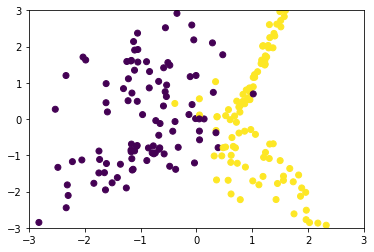

In [40]:
main()